In [1]:
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
irisdata = pd.read_csv('iris.csv');
irisdata.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
irisdata.species.unique().tolist()

['setosa', 'versicolor', 'virginica']

In [4]:
myDict = {
    'setosa':0,
    'versicolor':1,
    'virginica':2
}

numericClassifications = irisdata.copy()
numericClassifications.species = numericClassifications.species.map(myDict)
numericClassifications.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
X = numericClassifications.drop('species', axis = 1);
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
Y = numericClassifications['species']
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

In [7]:
X_train, X_test,Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, test_size = 0.2)
knn = KNN(n_neighbors=7)
knn.fit(X_train, Y_train)
Y_ = knn.predict(X_test)


conmat  =  confusion_matrix (Y_test,Y_)
conmat

array([[ 6,  0,  0],
       [ 0,  8,  2],
       [ 0,  1, 13]])

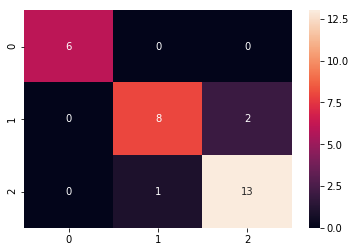

In [8]:
sns.heatmap(conmat, annot=True, fmt='g')
plt.show()

In [9]:
print(classification_report(Y_test,Y_))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00         6
          1       0.89      0.80      0.84        10
          2       0.87      0.93      0.90        14

avg / total       0.90      0.90      0.90        30

